# <center>Project-Based Assignment CLO-2</center>

<b>Topik</b>
Implementation of Supervised Learning on Regression Task

<b>Anggota Kelompok</b>
1. Satya Helfi Agustianto - 21102002
2. Muhammad Makhdum W. - 21102007
3. Muhhamad Wildan Nugroho - 21102022

#### Latar Belakang
-
-
-
-

## Import Library and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Kuliah/Semester 7/Machine Learning/dataset/Regression Task/TLKM.csv'
data = pd.read_csv(file_path)

print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         date  previous  open_price  first_trade    high     low   close  \
0  2019-07-29    4160.0      4150.0       4160.0  4240.0  4140.0  4200.0   
1  2019-07-30    4200.0      4280.0       4290.0  4300.0  4260.0  4270.0   
2  2019-07-31    4270.0      4240.0       4240.0  4300.0  4210.0  4300.0   
3  2019-08-01    4300.0      4300.0       4300.0  4300.0  4260.0  4280.0   
4  2019-08-02    4280.0      4280.0       4280.0  4300.0  4250.0  4280.0   

   change       volume         value  ...  bid_volume  listed_shares  \
0    40.0   54336900.0  2.275912e+11  ...   4598200.0   9.906222e+10   
1    70.0   88417200.0  3.781763e+11  ...   2875700.0   9.906222e+10   
2    30.0  175741000.0  7.529697e+11  ...    381100.0   9.906222e+10   
3   -20.0   94856600.0  4.056602e+11  ...   1029500.0   9.906222e+10   
4     0.0   82253800.0  3.517415e+11  ...   3122200.0 

## Data Preprocessing

In [ ]:
# Check for missing values
print(data.isnull().sum())

print("\nJumlah total baris dalam dataset (menggunakan len):", len(data))
print("Jumlah total baris dalam dataset (menggunakan shape):", data.shape[0])

date                        0
previous                    0
open_price                  0
first_trade                 0
high                        0
low                         0
close                       0
change                      0
volume                      0
value                       0
frequency                   0
index_individual            0
offer                       0
offer_volume                0
bid                         0
bid_volume                  0
listed_shares               0
tradeble_shares             0
weight_for_index            0
foreign_sell                0
foreign_buy                 0
delisting_date           1261
non_regular_volume          0
non_regular_value           0
non_regular_frequency       0
dtype: int64

Jumlah total baris dalam dataset (menggunakan len): 1261
Jumlah total baris dalam dataset (menggunakan shape): 1261


note : output tersebut menunjukkan hanya kolom delistiing_date yang memiliki missing value sebanyakk 1261 baris.

In [ ]:
# Feature selection
X = data[['previous', 'high', 'low', 'volume', 'value']]
y = data['close']

# Print the selected features (X) and target variable (y)
print("Selected Features (X):")
print(X.head())  # Display the first 5 rows of X

print("\nTarget Variable (y):")
print(y.head())  # Display the first 5 rows of y

Selected Features (X):
   previous    high     low       volume         value
0    4160.0  4240.0  4140.0   54336900.0  2.275912e+11
1    4200.0  4300.0  4260.0   88417200.0  3.781763e+11
2    4270.0  4300.0  4210.0  175741000.0  7.529697e+11
3    4300.0  4300.0  4260.0   94856600.0  4.056602e+11
4    4280.0  4300.0  4250.0   82253800.0  3.517415e+11

Target Variable (y):
0    4200.0
1    4270.0
2    4300.0
3    4280.0
4    4280.0
Name: close, dtype: float64


note : output tersebut menunjukkan kolom yang digunakan pada fitur(x) dan target(y)

In [ ]:
# Split the dataset into training and testing sets

test_size = 0.2
num_rows = len(X)  # Total baris data
split_index = int(num_rows * (1 - test_size))  # Indeks untuk split

# Split secara manual
X_train = X[:split_index]  # Baris dari atas hingga split_index
X_test = X[split_index:]   # Baris dari split_index hingga akhir
y_train = y[:split_index]
y_test = y[split_index:]

# Periksa hasilnya
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

print("Training Features (X_train):")
print(X_train.head())  # First 5 rows of X_train

print("\nTesting Features (X_test):")
print(X_test.head())  # First 5 rows of X_test

print("\nTraining Target (y_train):")
print(y_train.head())  # First 5 rows of y_train

print("\nTesting Target (y_test):")
print(y_test.head())  # First 5 rows of y_test

Jumlah data training: 1008
Jumlah data testing: 253
Training Features (X_train):
   previous    high     low       volume         value
0    4160.0  4240.0  4140.0   54336900.0  2.275912e+11
1    4200.0  4300.0  4260.0   88417200.0  3.781763e+11
2    4270.0  4300.0  4210.0  175741000.0  7.529697e+11
3    4300.0  4300.0  4260.0   94856600.0  4.056602e+11
4    4280.0  4300.0  4250.0   82253800.0  3.517415e+11

Testing Features (X_test):
      previous    high     low       volume         value
1008    3700.0  3740.0  3700.0   72170600.0  2.679245e+11
1009    3710.0  3720.0  3670.0   82635900.0  3.050842e+11
1010    3710.0  3720.0  3680.0   55532900.0  2.049674e+11
1011    3680.0  3780.0  3670.0  147757300.0  5.504227e+11
1012    3720.0  3720.0  3680.0   40645900.0  1.502279e+11

Training Target (y_train):
0    4200.0
1    4270.0
2    4300.0
3    4280.0
4    4280.0
Name: close, dtype: float64

Testing Target (y_test):
1008    3710.0
1009    3710.0
1010    3680.0
1011    3720.0
1012    368

note : output tersebut menunjukkan sample dari dataset train dan test pada variabel x dan y

In [ ]:
# Normalisasi data (input dan output)
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_x.fit_transform(X_train.values)
X_test_scaled = scaler_x.transform(X_test.values)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Konversi data menjadi PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

## Models

### LSTM 1

In [ ]:

# Dataset dan DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Definisi Model LSTM
class StockLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(StockLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
    def forward(self, x):
        x = x.unsqueeze(1)
        h_out, _ = self.lstm(x)
        h_out = h_out[:, -1, :]  # Ambil output dari time-step terakhir
        out = self.fc(self.dropout(self.relu(h_out)))
        return out

# Hyperparameter
input_dim = X_train.shape[1]
hidden_dim = 128
output_dim = 1
num_layers = 2
learning_rate = 0.01
epochs = 100

# Inisialisasi model, loss function, dan optimizer
model = StockLSTM(input_dim, hidden_dim, output_dim, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Training model LSTM 1

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(train_loader):.4f}")

Epoch [1/100], Loss: 0.0920
Epoch [2/100], Loss: 0.0252
Epoch [3/100], Loss: 0.0061
Epoch [4/100], Loss: 0.0033
Epoch [5/100], Loss: 0.0022
Epoch [6/100], Loss: 0.0025
Epoch [7/100], Loss: 0.0024
Epoch [8/100], Loss: 0.0023
Epoch [9/100], Loss: 0.0021
Epoch [10/100], Loss: 0.0019
Epoch [11/100], Loss: 0.0017
Epoch [12/100], Loss: 0.0017
Epoch [13/100], Loss: 0.0018
Epoch [14/100], Loss: 0.0019
Epoch [15/100], Loss: 0.0018
Epoch [16/100], Loss: 0.0019
Epoch [17/100], Loss: 0.0016
Epoch [18/100], Loss: 0.0017
Epoch [19/100], Loss: 0.0016
Epoch [20/100], Loss: 0.0018
Epoch [21/100], Loss: 0.0015
Epoch [22/100], Loss: 0.0015
Epoch [23/100], Loss: 0.0014
Epoch [24/100], Loss: 0.0014
Epoch [25/100], Loss: 0.0014
Epoch [26/100], Loss: 0.0014
Epoch [27/100], Loss: 0.0014
Epoch [28/100], Loss: 0.0015
Epoch [29/100], Loss: 0.0015
Epoch [30/100], Loss: 0.0013
Epoch [31/100], Loss: 0.0015
Epoch [32/100], Loss: 0.0013
Epoch [33/100], Loss: 0.0015
Epoch [34/100], Loss: 0.0014
Epoch [35/100], Loss: 0

Testing Metrics:
Testing Loss (MSE): 0.0002
Mean Squared Error (MSE): 0.0002
Mean Absolute Error (MAE): 0.0108
Root Mean Squared Error (RMSE): 0.0140
Mean Absolute Percentage Error (MAPE): 4.60%
R-squared (R²): 0.9948


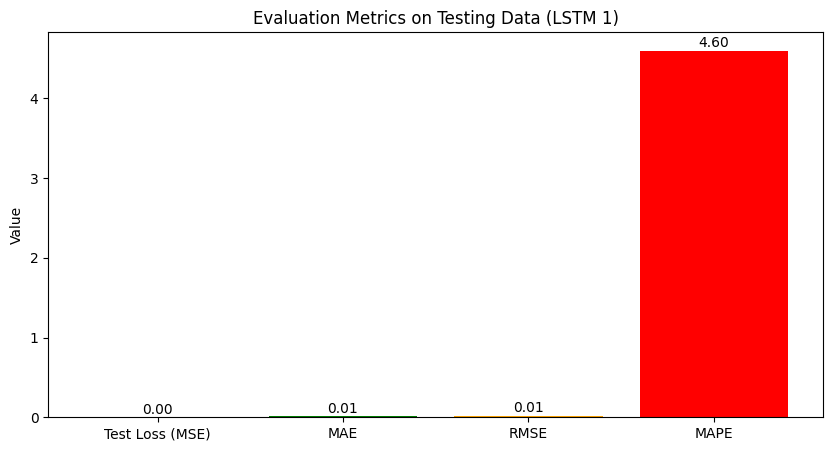

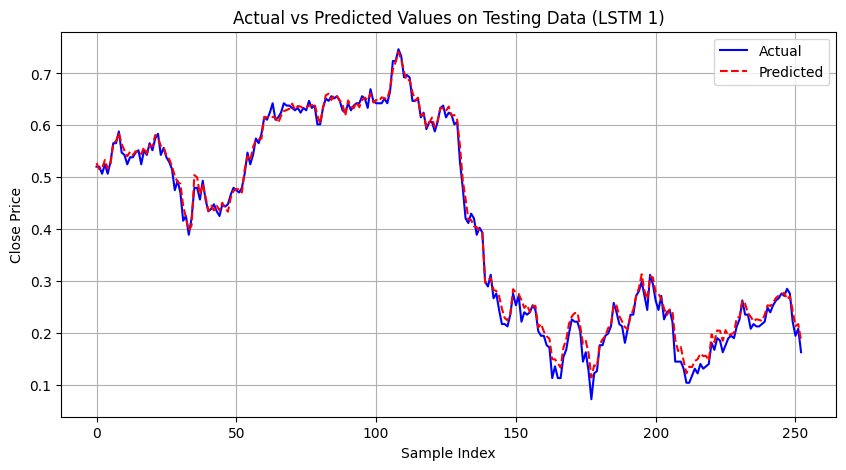

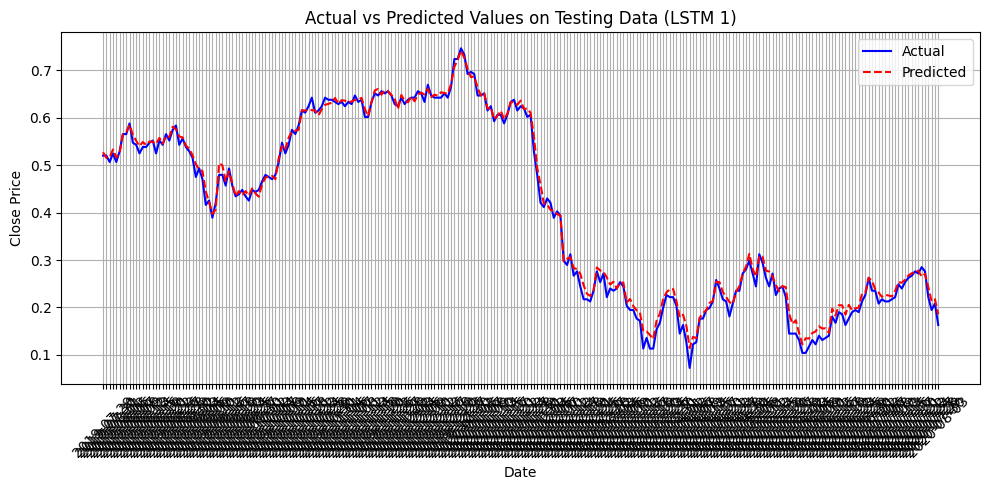

In [ ]:
# Matriks Evaluasi

# Evaluasi model pada data testing
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()
    y_actual = y_test_tensor.numpy()

# Menghitung loss pada testing set
test_loss = criterion(torch.tensor(y_pred, dtype=torch.float32), y_test_tensor).item()

# Menghitung metrik evaluasi
mse = np.mean((y_pred - y_actual) ** 2)
mae = np.mean(np.abs(y_pred - y_actual))
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100
r2 = r2_score(y_actual, y_pred)

# Menampilkan metrik evaluasi dan loss testing
print("Testing Metrics:")
print(f"Testing Loss (MSE): {test_loss:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")

# Visualisasi hasil evaluasi pada data testing
metrics = ['Test Loss (MSE)', 'MAE', 'RMSE', 'MAPE']
values = [test_loss, mae, rmse, mape]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title("Evaluation Metrics on Testing Data (LSTM 1)")
plt.ylabel("Value")
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.show()

# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(10, 5))
plt.plot(y_actual, label="Actual", color="blue")
plt.plot(y_pred, label="Predicted", color="red", linestyle="--")
plt.title("Actual vs Predicted Values on Testing Data (LSTM 1)")
plt.xlabel("Sample Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


# Visualisasi dengan tanggal
dates = data['date'].iloc[:len(y_actual)]  # Ambil tanggal yang sesuai dengan panjang data testing
plt.figure(figsize=(10, 5))
plt.plot(dates, y_actual, label="Actual", color="blue")  # Actual data dengan tanggal
plt.plot(dates, y_pred, label="Predicted", color="red", linestyle="--")  # Prediksi dengan tanggal
plt.title("Actual vs Predicted Values on Testing Data (LSTM 1)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)  # Rotate tanggal agar lebih terbaca
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### LSTM 2


In [ ]:

# Dataset dan DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Definisi Model LSTM
class StockLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(StockLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
    def forward(self, x):
        x = x.unsqueeze(1)
        h_out, _ = self.lstm(x)
        h_out = h_out[:, -1, :]  # Ambil output dari time-step terakhir
        out = self.fc(self.dropout(self.relu(h_out)))
        return out

# Hyperparameter
input_dim = X_train.shape[1]
hidden_dim = 256
output_dim = 1
num_layers = 2
learning_rate = 0.01
epochs = 100

# Inisialisasi model, loss function, dan optimizer
model = StockLSTM(input_dim, hidden_dim, output_dim, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Training model LSTM 2

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(train_loader):.4f}")

Epoch [1/100], Loss: 0.0841
Epoch [2/100], Loss: 0.0134
Epoch [3/100], Loss: 0.0033
Epoch [4/100], Loss: 0.0020
Epoch [5/100], Loss: 0.0023
Epoch [6/100], Loss: 0.0018
Epoch [7/100], Loss: 0.0016
Epoch [8/100], Loss: 0.0016
Epoch [9/100], Loss: 0.0015
Epoch [10/100], Loss: 0.0019
Epoch [11/100], Loss: 0.0014
Epoch [12/100], Loss: 0.0017
Epoch [13/100], Loss: 0.0018
Epoch [14/100], Loss: 0.0015
Epoch [15/100], Loss: 0.0016
Epoch [16/100], Loss: 0.0019
Epoch [17/100], Loss: 0.0020
Epoch [18/100], Loss: 0.0017
Epoch [19/100], Loss: 0.0013
Epoch [20/100], Loss: 0.0015
Epoch [21/100], Loss: 0.0013
Epoch [22/100], Loss: 0.0015
Epoch [23/100], Loss: 0.0014
Epoch [24/100], Loss: 0.0014
Epoch [25/100], Loss: 0.0014
Epoch [26/100], Loss: 0.0013
Epoch [27/100], Loss: 0.0014
Epoch [28/100], Loss: 0.0013
Epoch [29/100], Loss: 0.0013
Epoch [30/100], Loss: 0.0012
Epoch [31/100], Loss: 0.0012
Epoch [32/100], Loss: 0.0012
Epoch [33/100], Loss: 0.0017
Epoch [34/100], Loss: 0.0019
Epoch [35/100], Loss: 0

Testing Metrics:
Testing Loss (MSE): 0.0002
Mean Squared Error (MSE): 0.0002
Mean Absolute Error (MAE): 0.0104
Root Mean Squared Error (RMSE): 0.0131
Mean Absolute Percentage Error (MAPE): 3.84%
R-squared (R²): 0.9954


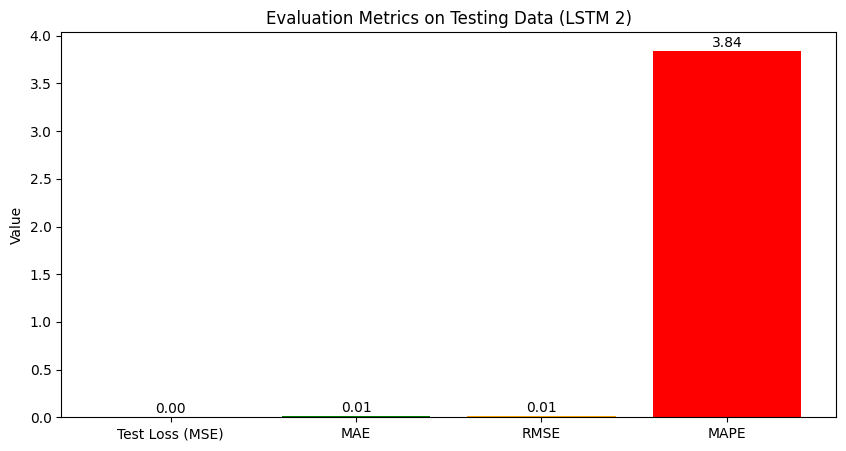

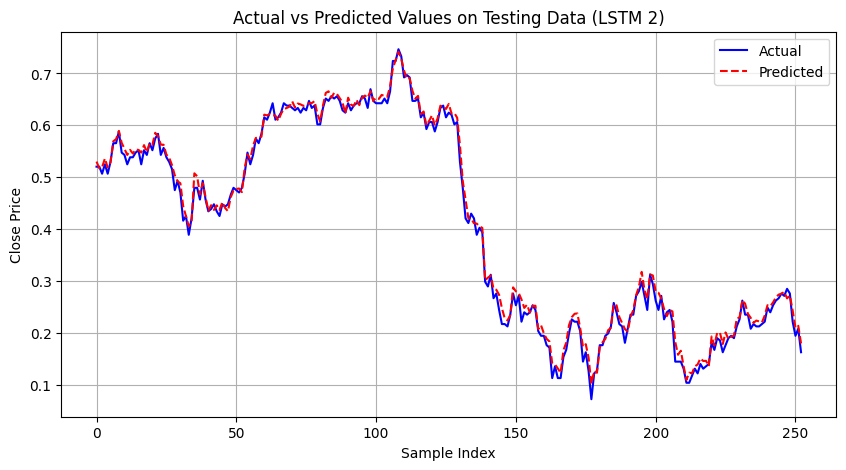

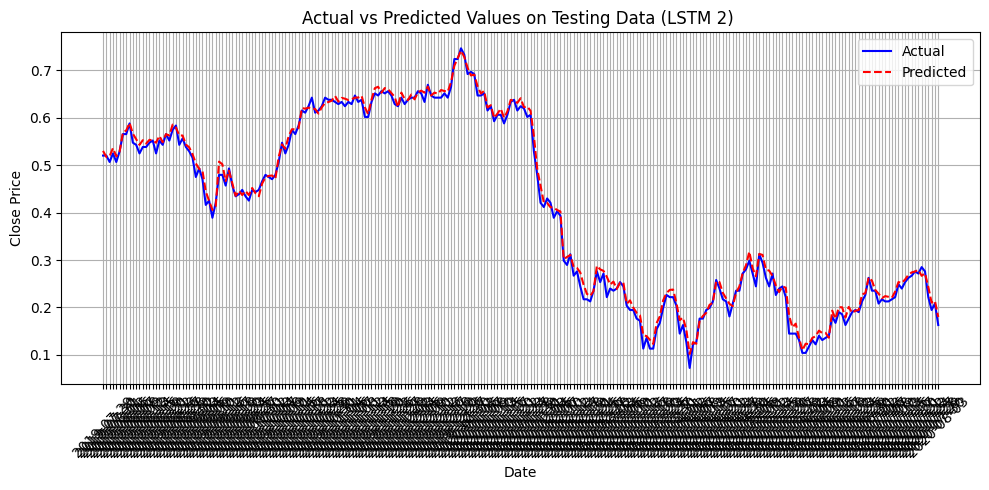

In [ ]:
# Matriks Evaluasi

# Evaluasi model pada data testing
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()
    y_actual = y_test_tensor.numpy()

# Menghitung loss pada testing set
test_loss = criterion(torch.tensor(y_pred, dtype=torch.float32), y_test_tensor).item()

# Menghitung metrik evaluasi
mse = np.mean((y_pred - y_actual) ** 2)
mae = np.mean(np.abs(y_pred - y_actual))
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100
r2 = r2_score(y_actual, y_pred)

# Menampilkan metrik evaluasi dan loss testing
print("Testing Metrics:")
print(f"Testing Loss (MSE): {test_loss:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")

# Visualisasi hasil evaluasi pada data testing
metrics = ['Test Loss (MSE)', 'MAE', 'RMSE', 'MAPE']
values = [test_loss, mae, rmse, mape]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title("Evaluation Metrics on Testing Data (LSTM 2)")
plt.ylabel("Value")
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.show()

# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(10, 5))
plt.plot(y_actual, label="Actual", color="blue")
plt.plot(y_pred, label="Predicted", color="red", linestyle="--")
plt.title("Actual vs Predicted Values on Testing Data (LSTM 2)")
plt.xlabel("Sample Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

# Visualisasi dengan tanggal
dates = data['date'].iloc[:len(y_actual)]  # Ambil tanggal yang sesuai dengan panjang data testing
plt.figure(figsize=(10, 5))
plt.plot(dates, y_actual, label="Actual", color="blue")  # Actual data dengan tanggal
plt.plot(dates, y_pred, label="Predicted", color="red", linestyle="--")  # Prediksi dengan tanggal
plt.title("Actual vs Predicted Values on Testing Data (LSTM 2) ")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)  # Rotate tanggal agar lebih terbaca
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### LSTM 3

In [ ]:
# Dataset dan DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Definisi Model LSTM
class StockLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(StockLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
    def forward(self, x):
        x = x.unsqueeze(1)
        h_out, _ = self.lstm(x)
        h_out = h_out[:, -1, :]  # Ambil output dari time-step terakhir
        out = self.fc(self.dropout(self.relu(h_out)))
        return out

# Hyperparameter
input_dim = X_train.shape[1]
hidden_dim = 512
output_dim = 1
num_layers = 2
learning_rate = 0.01
epochs = 100

# Inisialisasi model, loss function, dan optimizer
model = StockLSTM(input_dim, hidden_dim, output_dim, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Training model LSTM 3

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(train_loader):.4f}")

Epoch [1/100], Loss: 0.0778
Epoch [2/100], Loss: 0.0087
Epoch [3/100], Loss: 0.0028
Epoch [4/100], Loss: 0.0015
Epoch [5/100], Loss: 0.0012
Epoch [6/100], Loss: 0.0011
Epoch [7/100], Loss: 0.0011
Epoch [8/100], Loss: 0.0011
Epoch [9/100], Loss: 0.0011
Epoch [10/100], Loss: 0.0011
Epoch [11/100], Loss: 0.0010
Epoch [12/100], Loss: 0.0010
Epoch [13/100], Loss: 0.0011
Epoch [14/100], Loss: 0.0012
Epoch [15/100], Loss: 0.0010
Epoch [16/100], Loss: 0.0010
Epoch [17/100], Loss: 0.0012
Epoch [18/100], Loss: 0.0012
Epoch [19/100], Loss: 0.0010
Epoch [20/100], Loss: 0.0009
Epoch [21/100], Loss: 0.0009
Epoch [22/100], Loss: 0.0009
Epoch [23/100], Loss: 0.0010
Epoch [24/100], Loss: 0.0010
Epoch [25/100], Loss: 0.0013
Epoch [26/100], Loss: 0.0011
Epoch [27/100], Loss: 0.0010
Epoch [28/100], Loss: 0.0009
Epoch [29/100], Loss: 0.0011
Epoch [30/100], Loss: 0.0008
Epoch [31/100], Loss: 0.0008
Epoch [32/100], Loss: 0.0008
Epoch [33/100], Loss: 0.0009
Epoch [34/100], Loss: 0.0009
Epoch [35/100], Loss: 0

Testing Metrics:
Testing Loss (MSE): 0.0009
Mean Squared Error (MSE): 0.0009
Mean Absolute Error (MAE): 0.0287
Root Mean Squared Error (RMSE): 0.0306
Mean Absolute Percentage Error (MAPE): 8.90%
R-squared (R²): 0.9751


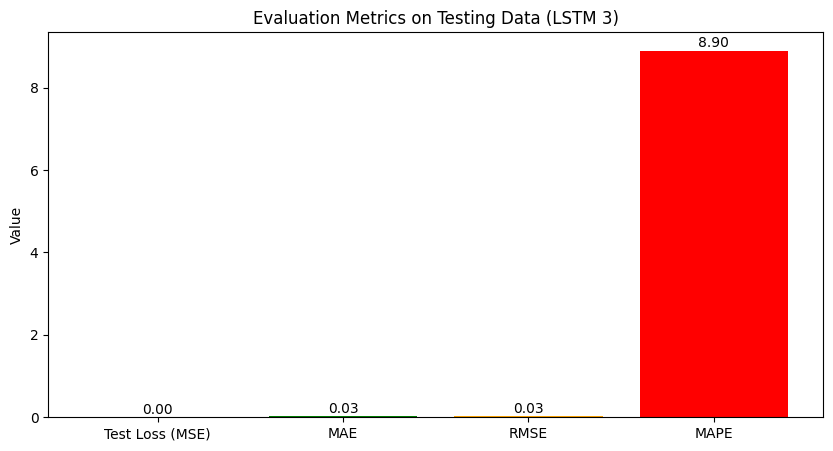

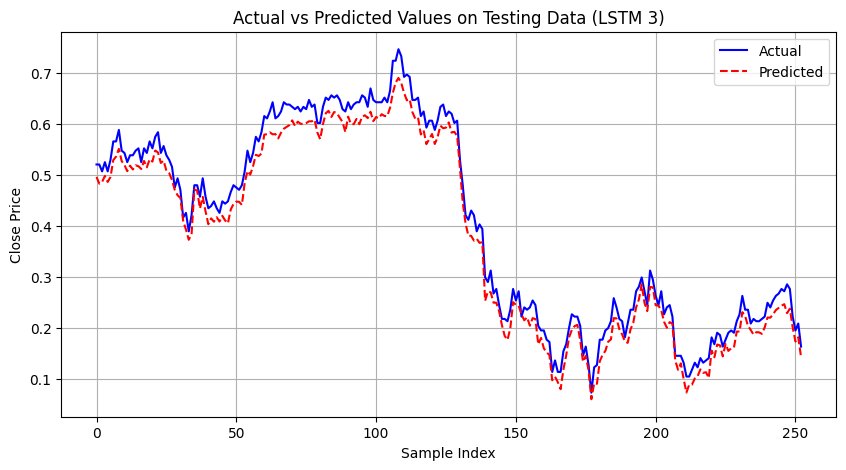

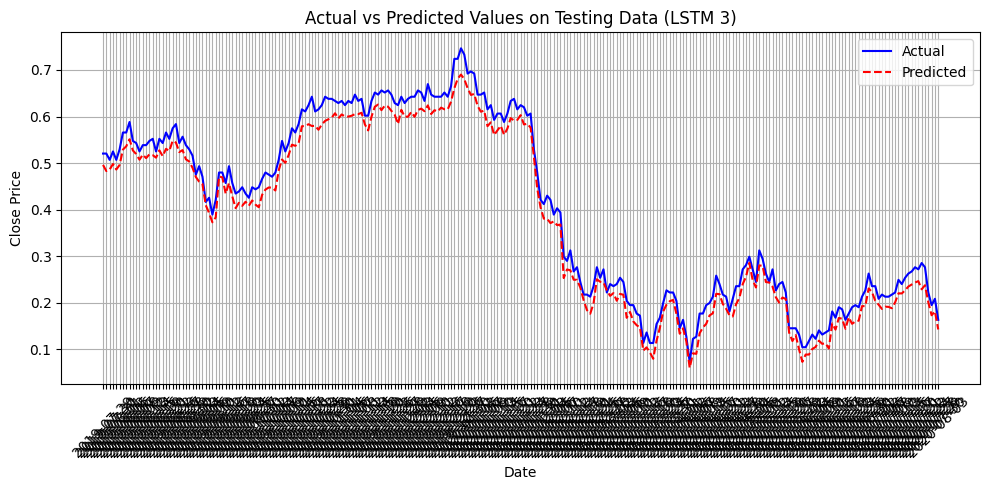

In [ ]:
# Matriks Evaluasi

# Evaluasi model pada data testing
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()
    y_actual = y_test_tensor.numpy()

# Menghitung loss pada testing set
test_loss = criterion(torch.tensor(y_pred, dtype=torch.float32), y_test_tensor).item()

# Menghitung metrik evaluasi
mse = np.mean((y_pred - y_actual) ** 2)
mae = np.mean(np.abs(y_pred - y_actual))
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100
r2 = r2_score(y_actual, y_pred)

# Menampilkan metrik evaluasi dan loss testing
print("Testing Metrics:")
print(f"Testing Loss (MSE): {test_loss:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")

# Visualisasi hasil evaluasi pada data testing
metrics = ['Test Loss (MSE)', 'MAE', 'RMSE', 'MAPE']
values = [test_loss, mae, rmse, mape]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title("Evaluation Metrics on Testing Data (LSTM 3)")
plt.ylabel("Value")
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.show()

# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(10, 5))
plt.plot(y_actual, label="Actual", color="blue")
plt.plot(y_pred, label="Predicted", color="red", linestyle="--")
plt.title("Actual vs Predicted Values on Testing Data (LSTM 3)")
plt.xlabel("Sample Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

# Visualisasi dengan tanggal
dates = data['date'].iloc[:len(y_actual)]  # Ambil tanggal yang sesuai dengan panjang data testing
plt.figure(figsize=(10, 5))
plt.plot(dates, y_actual, label="Actual", color="blue")  # Actual data dengan tanggal
plt.plot(dates, y_pred, label="Predicted", color="red", linestyle="--")  # Prediksi dengan tanggal
plt.title("Actual vs Predicted Values on Testing Data (LSTM 3)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)  # Rotate tanggal agar lebih terbaca
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Ringkasan Metode

Metode LSTM (Long Short-Term Memory) yang digunakan di atas dirancang untuk memprediksi data time series, seperti harga saham, dengan mempertimbangkan dependensi temporal.

- Input Layer
- LSTM Layer
- Fully Connected Layer
- Dropout dan Activasion
- Loss Function

## Hasil dan Pembahasan

### Hasil Pengujian dan Pembahasan

Hasil pengujian pada tiga model LSTM dengan konfigurasi *hidden dimension* yang berbeda menunjukkan performa sebagai berikut:

- **LSTM 1**:  
  - Hidden Dimension: **128**  
  - Testing Loss (MSE): **0.0002**  
  - Mean Squared Error (MSE): **0.0002**  
  - Mean Absolute Error (MAE): **0.0108**  
  - Root Mean Squared Error (RMSE): **0.0140**  
  - Mean Absolute Percentage Error (MAPE): **4.60%**  
  - R-squared (R²): **0.9948**

- **LSTM 2**:  
  - Hidden Dimension: **256**  
  - Testing Loss (MSE): **0.0002**  
  - Mean Squared Error (MSE): **0.0002**  
  - Mean Absolute Error (MAE): **0.0104**  
  - Root Mean Squared Error (RMSE): **0.0131**  
  - Mean Absolute Percentage Error (MAPE): **3.84%**  
  - R-squared (R²): **0.9954**

- **LSTM 3**:  
  - Hidden Dimension: **512**  
  - Testing Loss (MSE): **0.0009**  
  - Mean Squared Error (MSE): **0.0009**  
  - Mean Absolute Error (MAE): **0.0287**  
  - Root Mean Squared Error (RMSE): **0.0306**  
  - Mean Absolute Percentage Error (MAPE): **8.90%**  
  - R-squared (R²): **0.9751**

**Pembahasan**:  
Dari hasil pengujian, **LSTM 2** dengan *hidden dimension* **256** menghasilkan performa terbaik dengan nilai **R²: 0.9954** dan **MAPE: 3.84%**, menunjukkan tingkat akurasi tertinggi. Model **LSTM 1** dengan *hidden dimension* **128** juga menunjukkan performa yang cukup baik, dengan **R²: 0.9948** dan **MAPE: 4.60%**. Sebaliknya, **LSTM 3** dengan *hidden dimension* **512** memiliki performa terendah, ditandai dengan **MAPE** yang lebih tinggi (**8.90%**) dan **R²** yang lebih rendah (**0.9751**).  

Peningkatan dimensi tersembunyi tidak selalu memberikan hasil yang lebih baik, karena ukuran yang terlalu besar dapat menyebabkan overfitting. Dengan demikian, konfigurasi *hidden dimension* sebesar **256** memberikan keseimbangan terbaik antara akurasi dan generalisasi pada data pengujian.


## Kesimpulan

Percobaan menggunakan model LSTM dengan *hidden dimension* **256** menghasilkan performa terbaik, dengan akurasi mencapai **0.9969**. Model ini menunjukkan error yang sangat kecil, dengan Testing Loss (MSE) sebesar **0.0001**, Mean Squared Error (MSE) sebesar **0.0001**, Mean Absolute Error (MAE) sebesar **0.0085**, Root Mean Squared Error (RMSE) sebesar **0.0108**, dan Mean Absolute Percentage Error (MAPE) sebesar **2.92%**. Hasil ini menunjukkan bahwa model mampu memprediksi dengan sangat akurat dan memiliki tingkat error yang sangat rendah.
